# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
# Number of rows and columns
print(df_data.shape)

# Column names
print(df_data.columns)

(4324, 9)
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [7]:
# NaN values
print(df_data.isna())

# Duplicates
print(df_data.duplicated)


      Unnamed: 0  Unnamed: 0.1  ...  Price  Mission_Status
0          False         False  ...  False           False
1          False         False  ...  False           False
2          False         False  ...   True           False
3          False         False  ...  False           False
4          False         False  ...  False           False
...          ...           ...  ...    ...             ...
4319       False         False  ...   True           False
4320       False         False  ...   True           False
4321       False         False  ...   True           False
4322       False         False  ...   True           False
4323       False         False  ...   True           False

[4324 rows x 9 columns]
<bound method DataFrame.duplicated of       Unnamed: 0  Unnamed: 0.1  ...  Price Mission_Status
0              0             0  ...   50.0        Success
1              1             1  ...  29.75        Success
2              2             2  ...    NaN        Succe

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
# Drop NaN
no_null_df = df_data.dropna()
no_null_df.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [9]:
# Drop duplicates too
no_dup_df = df_data.drop_duplicates()
no_dup_df.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [10]:
# Drop duplicates, then NaN
clean_df = df_data.dropna()
clean_df.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      964 non-null    int64 
 1   Unnamed: 0.1    964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<BarContainer object of 964 artists>

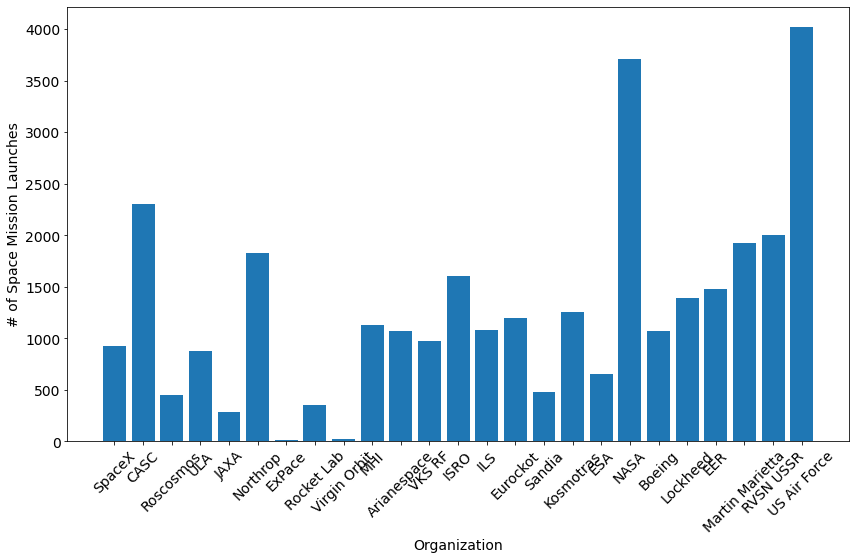

In [12]:
# Set the figure size, x and y axis ticks, and x and y axis labels
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('# of Space Mission Launches', fontsize=14)
plt.xlabel('Organization', fontsize=14)

# Make bar graph organization and number of launches
plt.bar(clean_df['Organisation'], clean_df['Unnamed: 0.1'])

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [13]:
# Status count of rocket
counts = clean_df['Rocket_Status'].value_counts()
print(counts)

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64


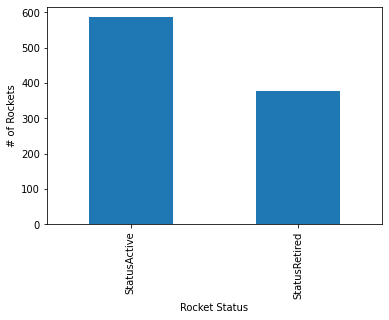

In [14]:
# Graph values per status count
plt.xlabel("Rocket Status")
plt.ylabel("# of Rockets")
counts = clean_df['Rocket_Status'].value_counts()
counts.plot(kind='bar')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [15]:
# Status count of mission
counts = clean_df['Mission_Status'].value_counts()
print(counts)

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64


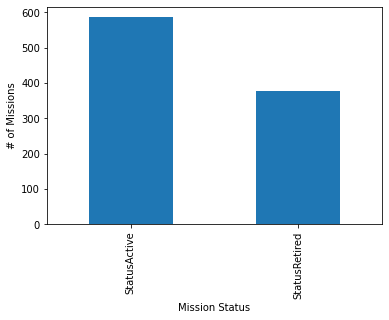

In [16]:
# Plot status counts of mission
plt.xlabel("Mission Status")
plt.ylabel("# of Missions")
counts = clean_df['Rocket_Status'].value_counts()
counts.plot(kind='bar')

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [17]:
# Convert to string and remove comma
clean_df['Price'] = clean_df['Price'].astype(str)
clean_df['Price'] = clean_df['Price'].str.replace(",", "")

# Convert to float and then to int
clean_df['Price'] = clean_df['Price'].astype(float)
clean_df['Price'] = clean_df['Price'].astype(int)
display(clean_df.dtypes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Unnamed: 0         int64
Unnamed: 0.1       int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price              int64
Mission_Status    object
dtype: object

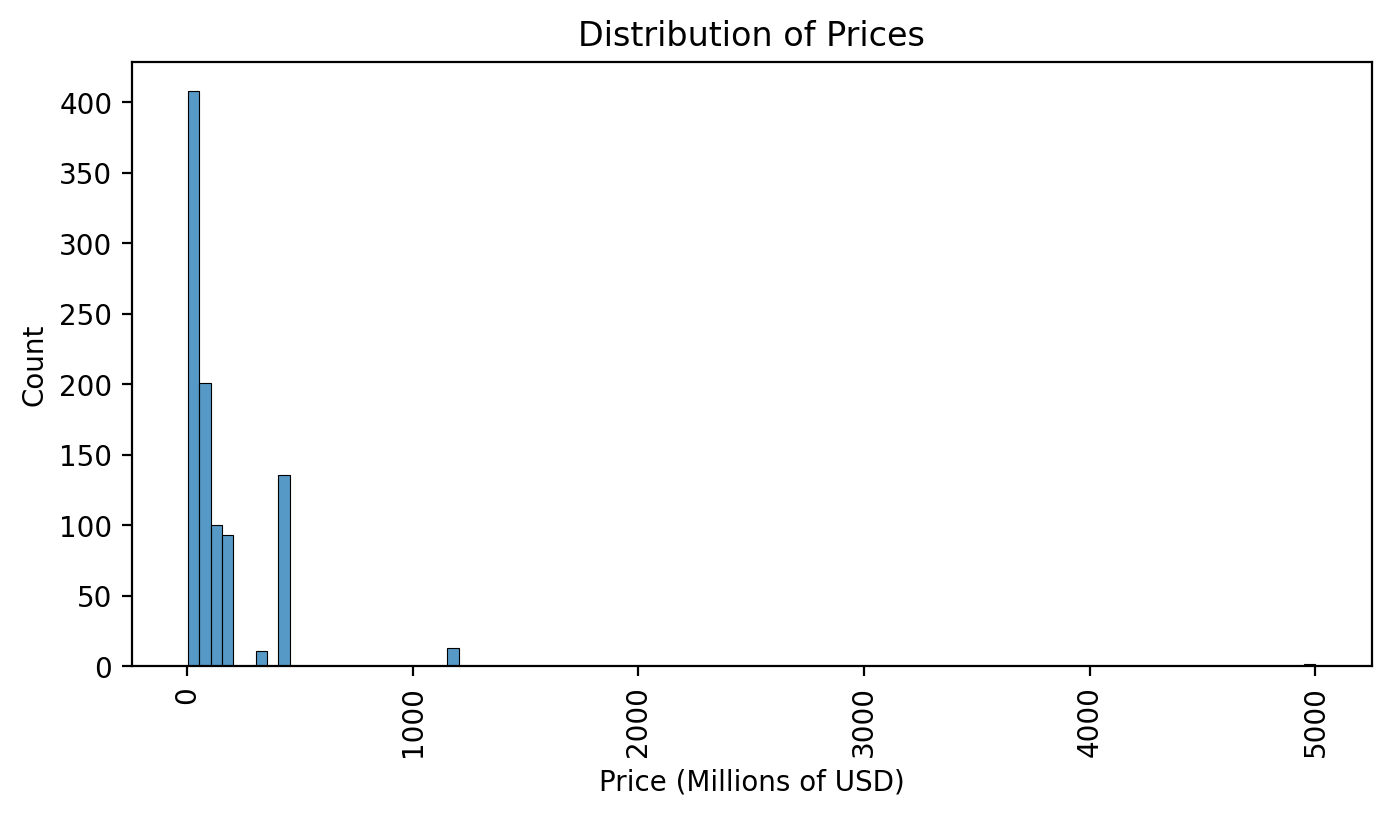

In [18]:
# Set figure size and plot count of 'winning_age' data (10 bins)
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(x=clean_df["Price"], bins=100)

# Set axis label and title
plt.xlabel('Price (Millions of USD)')
plt.xticks(rotation='vertical')
plt.title('Distribution of Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [19]:
# Group by birth country and ISO code combination and get count of prizes per combo
# countries = clean_df.groupby(['Location', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
import iso3166
country_names = []
for location in clean_df['Location']:
  # Get the country
  loc = location.split(', ')
  country = loc[len(loc) - 1]

  # Get different country name if necessary, then append
  if country == "Russia":
   country = "Russian Federation"
  elif country == "Yellow Sea":
   country = "China"
  elif country == "Shahrud Missile Test Site":
   country = "Iran"
  elif country == "Pacific Missile Range Facility":
   country = "USA"
  elif country == "Barents Sea":
   country = "Russian Federation"
  elif country == "Gran Canaria":
   country = "USA"
  country_names.append(country)

# Get the ISO country codes per country name
country_codes = []
for name in country_names:
  if name == 'USA':
    code = iso3166.countries_by_name['UNITED STATES OF AMERICA'][2]
  else:
    code = iso3166.countries_by_name[name.upper()][2]
  country_codes.append(code)

# Add 2 new columns for country names and their ISO codes
clean_df['Country'] = country_names
clean_df['ISO'] = country_codes
clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29,Success,China,CHN
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64,Success,China,CHN


# Use a Choropleth Map to Show the Number of Failures by Country


In [20]:
# Calling DataFrame constructor on list
# initialise data of lists.
data = {'Country': [], 'ISO': [], 'Failure': []}

for ind in clean_df.index:
  # New dataframe has name of country, ISO code, and failure (if any)
  if clean_df['Mission_Status'][ind] != 'Success':
    data['Country'].append(clean_df['Country'][ind])
    data['ISO'].append(clean_df['ISO'][ind])
    data['Failure'].append(clean_df['Mission_Status'][ind])

# Create DataFrame
df = pd.DataFrame(data)

# Group by birth country and ISO code combination and get count of prizes per combo
countries = df.groupby(['Country', 'ISO'], as_index=False).agg({'Failure': pd.Series.count})

In [21]:
# ISO is location, 'prize' value is color, birth country is hover name
world_map = px.choropleth(countries,
                          locations='ISO',
                          color='Failure', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)
# Show color scale and map
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [22]:
country = clean_df.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Price': pd.Series.count})
country.sort_values('Price', ascending=False)


,Country,Organisation,Mission_Status,Price
2,China,CASC,Success,152
39,USA,NASA,Success,146
49,USA,ULA,Success,97
47,USA,SpaceX,Success,93
6,France,Arianespace,Success,91
42,USA,Northrop,Success,74
10,India,ISRO,Success,59
12,Japan,MHI,Success,37
29,Russian Federation,VKS RF,Success,26
52,USA,US Air Force,Success,23


In [23]:
import plotly.express as px
# Subburst plot with 'prize' values of 'path' columns
sunburst = px.sunburst(country, path=['Country', 'Organisation', 'Mission_Status'],
                       values='Price', title='How much were spent on Space Race missions?')

In [24]:
# Set layout and show
sunburst.update_layout(xaxis_title='Price (USD Millions)', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
 
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [25]:
# Organization spending 
organisation_spend = clean_df.groupby('Organisation', as_index=True).agg({'Price': pd.Series.count})

In [26]:
# Sort the values
organisation_spend.sort_values('Price', ascending=False)

,Price
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


# Analyse the Amount of Money Spent by Organisation per Launch

In [27]:
# Organization spending per launch
organisation_spend_launch = clean_df.groupby(['Organisation', 'Unnamed: 0'], as_index=True).agg({'Price': pd.Series.count})

In [28]:
# Sort the values
organisation_spend_launch.sort_values('Price', ascending=False)

Price
Organisation Unnamed: 0       
Arianespace  40              1
Northrop     603             1
             1210            1
             1214            1
             1223            1
...                        ...
ISRO         602             1
             614             1
             634             1
             651             1
Virgin Orbit 27              1

[964 rows x 1 columns]

# Chart the Number of Launches per Year

In [29]:
years = []
for date in clean_df['Date']:
  line = date.split(' ')
  year = line[3]
  years.append(year)

clean_df['Year'] = years
clean_df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59,Success,USA,USA,1966
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success,USA,USA,1965
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63,Success,USA,USA,1965
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63,Success,USA,USA,1964
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63,Failure,USA,USA,1964


<Figure size 1152x720 with 0 Axes>

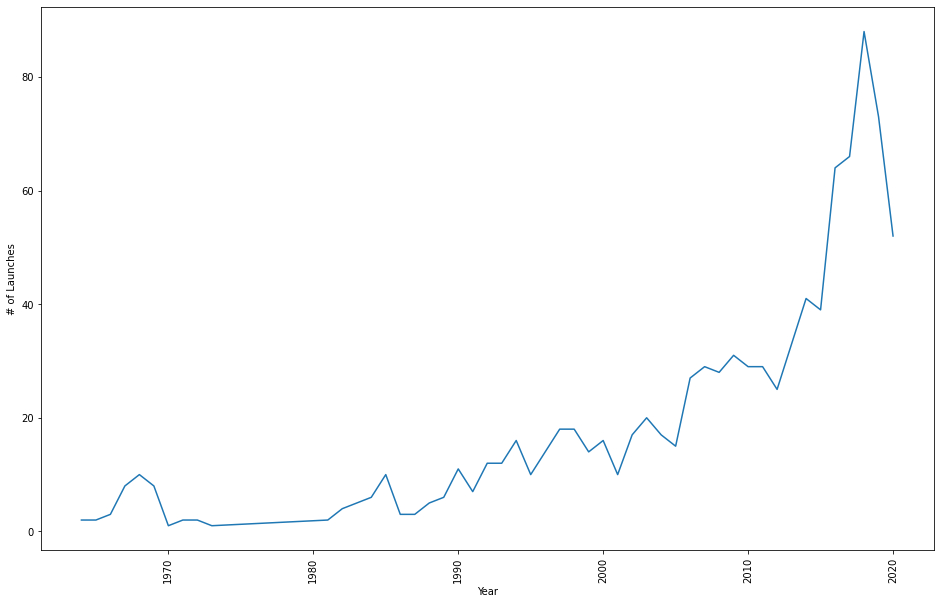

In [39]:
# Get launches per year
plt.figure(figsize=(16,10)) 
launch_per_year = clean_df.value_counts('Year')

# Store number of launches each year
launch = {}
for ind in launch_per_year.index:
  launch[ind] = launch_per_year[ind]

# Keys and values of dictionary
list_keys = list(launch.keys())
list_values = list(launch.values())

for i in range(len(list_keys)):
  # We want the last pair of adjacent elements to be (n-2, n-1)
  for j in range(len(list_keys) - 1):
      if list_keys[j] > list_keys[j+1]:
          # Swap
          list_keys[j], list_keys[j+1] = list_keys[j+1], list_keys[j]

sorted_launch = {}
# Get key in sorted list_keys and put correspinding value in sorted dict
for key in list_keys:
  sorted_launch[key] = launch[key]

sorted_list_keys = pd.to_numeric(list(sorted_launch.keys()))
sorted_list_values = list(sorted_launch.values())

# Plot keys and values
plt.figure(figsize=(16,10)) 
plt.xlabel('Year')
plt.ylabel('# of Launches')
plt.xticks(rotation='vertical')
plt.plot(sorted_list_keys, sorted_list_values)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [41]:
months = []

for date in clean_df['Date']:
  # Append month
  line = date.split(' ')
  month = line[1]
  months.append(month)

# Add column of months
clean_df['Month'] = months
clean_df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59,Success,USA,USA,1966,Jul
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success,USA,USA,1965,May
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63,Success,USA,USA,1965,Feb
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63,Success,USA,USA,1964,Dec
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63,Failure,USA,USA,1964,Sep


In [42]:
# Get value in counts of month and year
clean_df_years = clean_df.value_counts(['Month', 'Year'])
clean_df_years.to_frame()

# Conversion of month and new dictionary to be turned int dataframe
month_conv = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
              'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
year_rolling = {'Month': [], 'Year': [], 'Count': []}

for ind in clean_df_years.index:
  # Append month number
  month_num = month_conv[ind[0]]               
  year_rolling['Month'].append(month_num)

  # Append year number and count
  year_rolling['Year'].append(int(ind[1]))
  year_rolling['Count'].append(clean_df_years[ind])

year_rolling = pd.DataFrame(year_rolling)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,5.00,4.00,9.00,3.00,5.00,8.00,2.00,7.00,5.00,2.00,5.00,9.00
2017,3.00,3.00,5.00,2.00,5.00,12.00,2.00,7.00,6.00,9.00,4.00,8.00
2018,11.00,6.00,6.00,9.00,7.00,6.00,6.00,3.00,5.00,8.00,10.00,11.00
2019,5.00,2.00,5.00,6.00,6.00,6.00,7.00,10.00,5.00,5.00,7.00,9.00
2020,7.00,8.00,6.00,4.00,6.00,7.00,12.00,2.00,0.00,0.00,0.00,0.00


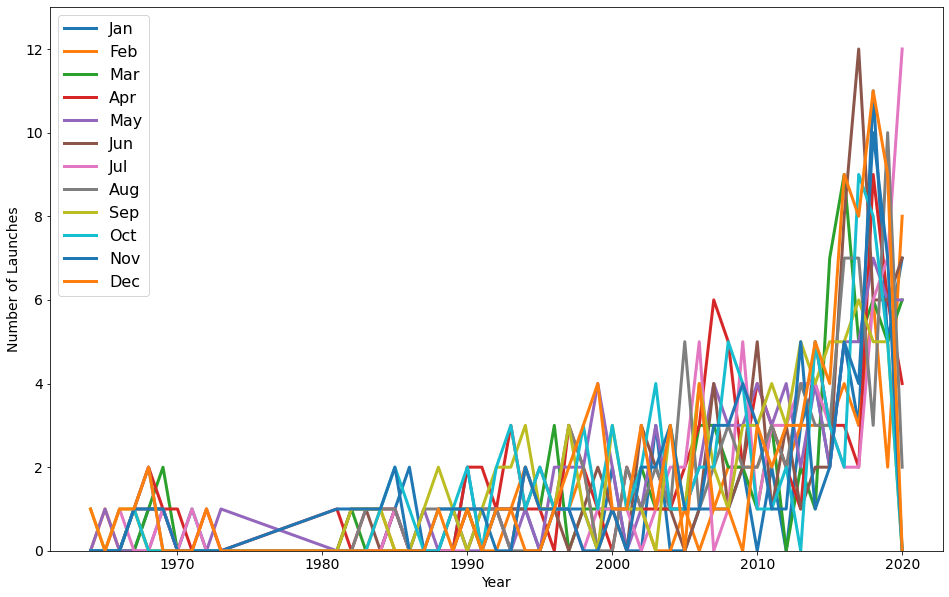

In [43]:
# Set figure dimensions and fontsize of x and y axis ticks
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set x and y axis labels and fontsize
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
# Limit y to 13
plt.ylim(0, 13)

# Indices are years, columns are month, and count of year/month are values
reshaped_year_rolling = year_rolling.pivot(index='Year', columns='Month', values='Count')
# Fill null with 0
reshaped_year_rolling.fillna(0, inplace=True)

# Convert number back to month
month_conv_back = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
                   9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

for col in reshaped_year_rolling.columns:
  # Plot the line with index values as x, counts of launches a month as y, and column month name as label
  month_num = reshaped_year_rolling[col].name
  plt.plot(reshaped_year_rolling.index, reshaped_year_rolling[col], 
           linewidth=3, label=month_conv_back[month_num])
  
# Show legend of plot (fontsize is 16)
plt.legend(fontsize=16) 
reshaped_year_rolling.tail()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [44]:
# Chart average launches each month
launch_avgs = {}
for col in reshaped_year_rolling.columns:
  # Get month number and convert to name
  month_num = reshaped_year_rolling[col].name
  month_name = month_conv_back[month_num]

  # Get average of launches per month and put into dictionary
  avg_launches = reshaped_year_rolling[col].mean()
  launch_avgs[month_name] = avg_launches

<BarContainer object of 12 artists>

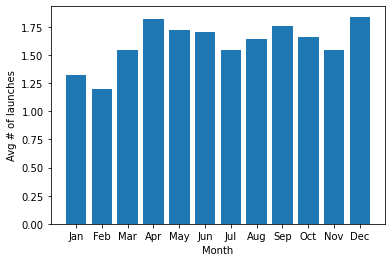

In [45]:
# Keys and values of dictionary
keys = launch_avgs.keys()
values = launch_avgs.values()

# Plot keys and values
plt.xlabel('Month')
plt.ylabel('Avg # of launches')
plt.bar(keys, values)

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [46]:
prices = {}
price_counts = {}

for ind in clean_df.index:
  # Get column values
  month = clean_df['Month'][ind]
  year = clean_df['Year'][ind]
  price = clean_df['Price'][ind]
  
  # Fill dictionaries
  prices[year] = 0
  price_counts[year] = 0

for ind in clean_df.index:
  # Get column values
  month = clean_df['Month'][ind]
  year = clean_df['Year'][ind]
  price = clean_df['Price'][ind]

  # Update price and price counts for each year
  prices[year] = prices[year] + price
  price_counts[year] = price_counts[year] + 1

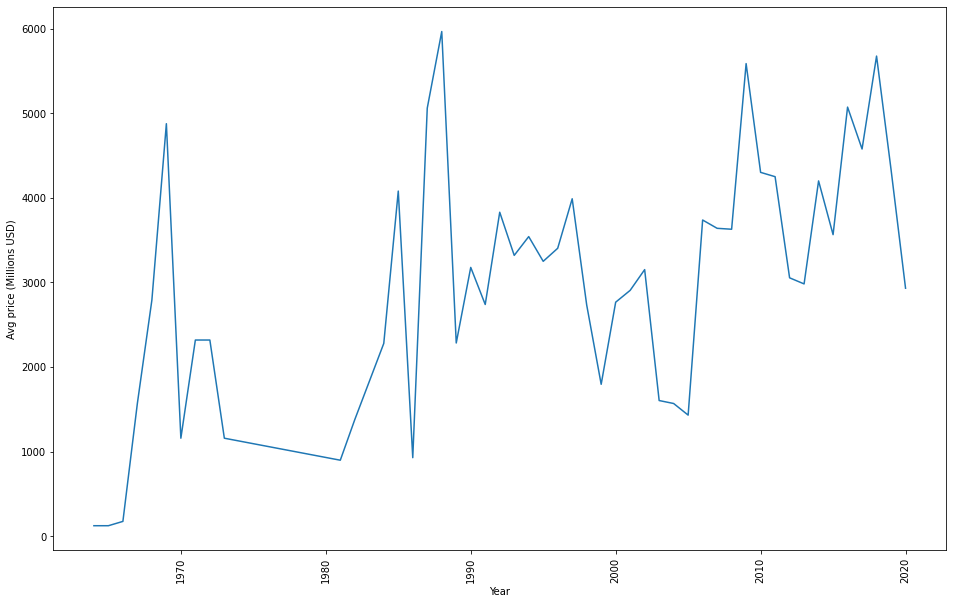

In [47]:
avg_prices = {}

for key in prices:
  # Get price total and number prices
  total_price = prices[key]
  num_prices = price_counts[key]

  # Calculate average price and put into dict
  avg_price = total_price / num_prices
  avg_prices[key] = avg_price

# Keys and values of dictionary
list_keys = list(avg_prices.keys())
list_values = list(avg_prices.values())

for i in range(len(list_keys)):
  # We want the last pair of adjacent elements to be (n-2, n-1)
  for j in range(len(list_keys) - 1):
      if list_keys[j] > list_keys[j+1]:
          # Swap
          list_keys[j], list_keys[j+1] = list_keys[j+1], list_keys[j]

# Get key in sorted list_keys and put correspinding value in sorted dict
sorted_prices = {}
for key in list_keys:
  sorted_prices[key] = prices[key]

sorted_list_keys = pd.to_numeric(list(sorted_prices.keys()))
sorted_list_values = list(sorted_prices.values())

# Plot keys and values
plt.figure(figsize=(16,10)) 
plt.xlabel('Year')
plt.ylabel('Avg price (Millions USD)')
plt.xticks(rotation='vertical')
plt.plot(sorted_list_keys, sorted_list_values)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [48]:
# Top 10 launches
number_launches = clean_df.value_counts('Organisation')
top_10_number_launches = number_launches[:10]

top_10 = []
for ind in top_10_number_launches.index:
  top_10.append(ind)

In [49]:
# Get value in counts of month and year
clean_df_org = clean_df.value_counts(['Organisation','Year'])
clean_df_org.to_frame()

# Top 10 launches
top_10_launches = {'Organisation': [], 'Year': [], 'Count': []}
for ind in clean_df_org.index:
  # Organisation, year, and count
  org = ind[0]
  year = ind[1]
  count = clean_df_org[ind]

  # If Organisation in top 10, append in dictionary
  if org in top_10:
    top_10_launches['Organisation'].append(org)
    top_10_launches['Year'].append(year)
    top_10_launches['Count'].append(count)

# Convert to dictionary
top_10_launches = pd.DataFrame(top_10_launches)
top_10_launches.head()

,Organisation,Year,Count
0,CASC,2018,27
1,CASC,2019,21
2,SpaceX,2018,21
3,SpaceX,2017,18
4,CASC,2020,16


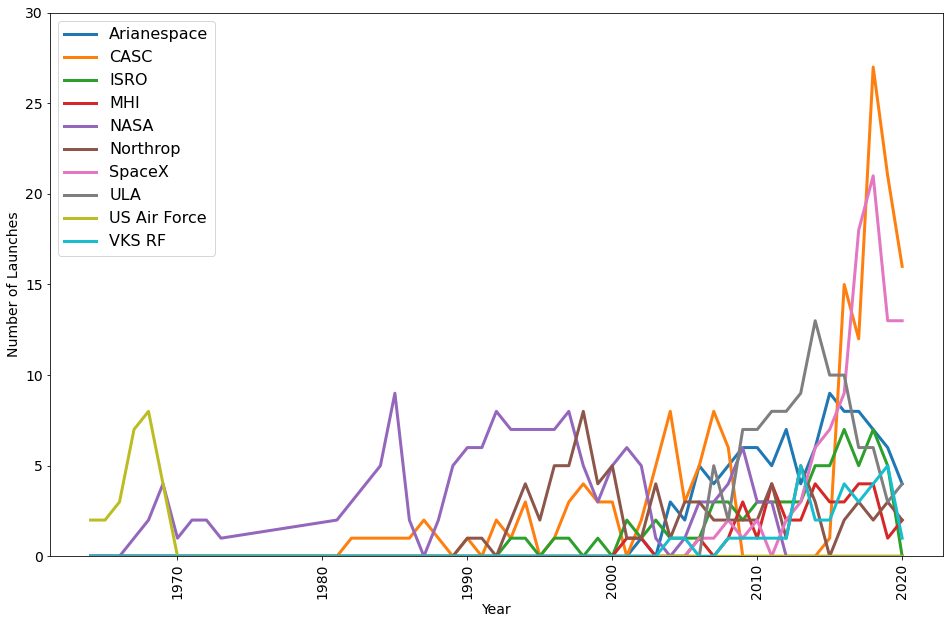

In [138]:
# Indices are years, columns are organisation, and count of year/organisation are values
reshaped_top_10 = top_10_launches.pivot(index='Year', columns='Organisation', values='Count')
# Fill null with 0
reshaped_top_10.fillna(0, inplace=True)

# Set figure dimensions and fontsize of x and y axis ticks
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set x and y axis labels and fontsize
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Launches', fontsize=14)
# Limit y to 13
plt.ylim(0, 30)

for col in reshaped_top_10.columns:
  # Plot the line with index values as x, counts of launches a month as y, and column month name as label
  reshaped_top_10.index = pd.to_numeric(reshaped_top_10.index)
  plt.plot(reshaped_top_10.index, reshaped_top_10[col], 
           linewidth=3, label=reshaped_top_10[col].name)
  
# Show legend of plot (fontsize is 16)
plt.legend(fontsize=16) 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [53]:
# Filter Cold War dates and countries
clean_df_cold_war = clean_df[clean_df['Year'].astype(int) <= 1991]
clean_df_cold_war = clean_df_cold_war.loc[(clean_df['ISO'] == 'USA') | (clean_df['ISO'] == 'RUS') | (clean_df['ISO'] == 'KAZ')]
clean_df_cold_war.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year,Month
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59,Success,USA,USA,1966,Jul
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63,Success,USA,USA,1965,May
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63,Success,USA,USA,1965,Feb
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63,Success,USA,USA,1964,Dec
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63,Failure,USA,USA,1964,Sep


In [54]:
for ind in clean_df_cold_war.index:
  # Make Soviet Union key
  if clean_df_cold_war['ISO'][ind] != 'USA':
    clean_df_cold_war['ISO'][ind] = 'RUS'
    clean_df_cold_war['Country'][ind] = 'Russian Federation'
    print(clean_df_cold_war['ISO'][ind])


RUS
RUS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [55]:
ussr_vs_usa = clean_df_cold_war.value_counts('Country')
print(ussr_vs_usa)

Country
USA                   90
Russian Federation     2
dtype: int64


In [56]:
# Plot percentage of launches
fig = px.pie(clean_df_cold_war, values='Unnamed: 0', names='Country', title='USA vs USSR Launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

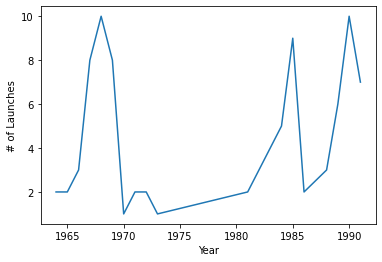

In [108]:
# USA launches per year
usa_war = clean_df_cold_war[clean_df_cold_war['ISO'] == 'USA']
usa_war_year = usa_war.value_counts('Year')

# Convert to dataframe and sort index
usa_war_year = usa_war_year.to_frame()
usa_war_year = usa_war_year.sort_index()

# Make years numeric, title axes, and plot data
usa_war_year.index = pd.to_numeric(usa_war_year.index)
plt.xlabel('Year')
plt.ylabel('# of Launches')
plt.plot(usa_war_year.index, usa_war_year.values)

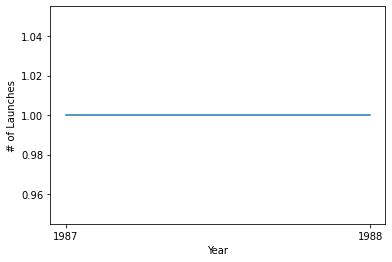

In [111]:
# RUS launches per year
ussr_war = clean_df_cold_war[clean_df_cold_war['ISO'] == 'RUS']
ussr_war_year = ussr_war.value_counts('Year')

# Convert to dataframe and sort index
ussr_war_year = ussr_war_year.to_frame()
ussr_war_year = ussr_war_year.sort_index()

# Make years numeric, title axes, and plot data
plt.xlabel('Year')
plt.ylabel('# of Launches')
plt.plot(ussr_war_year.index, ussr_war_year.values)

## Chart the Total Number of Mission Failures Year on Year.

In [112]:
# Calling DataFrame constructor on list
# initialise data of lists.
data = {'Country': [], 'ISO': [], 'Failure': [], 'Year': []}

for ind in clean_df_cold_war.index:
  # New dataframe has name of country, ISO code, and failure (if any)
  if clean_df_cold_war['Mission_Status'][ind] != 'Success':
    data['Country'].append(clean_df_cold_war['Country'][ind])
    data['ISO'].append(clean_df_cold_war['ISO'][ind])
    data['Failure'].append(clean_df_cold_war['Mission_Status'][ind])
    data['Year'].append(clean_df_cold_war['Year'][ind])

# Create DataFrame
df = pd.DataFrame(data)

# Group by birth country and ISO code combination and get count of prizes per combo
countries = df.groupby(['Country', 'ISO', 'Year'], as_index=False).agg({'Failure': pd.Series.count})
print(countries)

  Country  ISO  Year  Failure
0     USA  USA  1964        1
1     USA  USA  1967        2
2     USA  USA  1968        1
3     USA  USA  1986        1
4     USA  USA  1990        1
5     USA  USA  1991        1


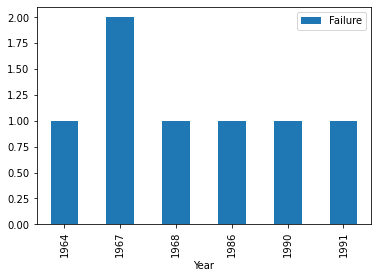

In [113]:
# Bar chart of failures by year
chart = countries.plot.bar(x='Year', y='Failure')

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [114]:
# Plot percentage of failures by year
fig = px.pie(countries, values='Failure', names='Year', title='Failures by Year')

In [115]:
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [116]:
country_clean_df = clean_df.value_counts(['Year', 'Country'], sort=True)
print(country_clean_df)

Year  Country           
2018  USA                   29
2017  USA                   27
2018  China                 27
2014  USA                   22
2019  China                 21
                            ..
1990  China                  1
2020  Russian Federation     1
1999  Kazakhstan             1
1988  Kazakhstan             1
2002  France                 1
Length: 178, dtype: int64


In [117]:
countries = {}
values = {}

# Fill the number of years in the dictionaries
for value_tuple, count in country_clean_df.iteritems():
  year = int(value_tuple[0])
  countries[year] = ''
  values[year] = 0

for value_tuple, count in country_clean_df.iteritems():
  # Get year and country
  year = int(value_tuple[0])
  country = value_tuple[1]

  # If country not in, put it and value in index of year
  if len(countries[year]) == 0:
    countries[year] = country
    values[year] = count

  # If the count is greater than or equal to value in dict, update values
  if count >= values[year]:
    countries[year] = country
    values[year] = count

for x, y in sorted(countries.items()):
  print(x, y)


1964 USA
1965 USA
1966 USA
1967 USA
1968 USA
1969 USA
1970 USA
1971 USA
1972 USA
1973 USA
1981 USA
1982 USA
1983 USA
1984 USA
1985 USA
1986 USA
1987 China
1988 USA
1989 USA
1990 USA
1991 USA
1992 USA
1993 USA
1994 USA
1995 USA
1996 USA
1997 USA
1998 USA
1999 USA
2000 USA
2001 USA
2002 USA
2003 USA
2004 China
2005 USA
2006 USA
2007 USA
2008 USA
2009 USA
2010 USA
2011 USA
2012 USA
2013 USA
2014 USA
2015 USA
2016 USA
2017 USA
2018 USA
2019 China
2020 USA


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [118]:
organisation_clean_df = clean_df.value_counts(['Year', 'Organisation'], sort=True)
organisation_clean_df.to_frame()

0
Year Organisation    
2018 CASC          27
     SpaceX        21
2019 CASC          21
2017 SpaceX        18
2020 CASC          16
...                ..
2000 Lockheed       1
2008 MHI            1
2001 MHI            1
     Northrop       1
2020 Virgin Orbit   1

[268 rows x 1 columns]

In [119]:
doing_most = {'Year': [], 'Organisation': [], 'Count': []}
for ind in organisation_clean_df.index:
  # Year, org, and count
  year = ind[0]
  org = ind[1]
  count = organisation_clean_df[ind]

  # Append into dictionary lists
  doing_most['Year'].append(year)
  doing_most['Organisation'].append(org)
  doing_most['Count'].append(count)

doing_most = pd.DataFrame(doing_most)
doing_most.head()

,Year,Organisation,Count
0,2018,CASC,27
1,2018,SpaceX,21
2,2019,CASC,21
3,2017,SpaceX,18
4,2020,CASC,16


In [154]:
# Sort years and open up count organisation doing most
years_sorted = sorted(doing_most['Year'])
print()
org_doing_most = {}
count_doing_most = {}

# Fill in each year
for year in years_sorted:
  org_doing_most[year] = ''
  count_doing_most[year] = 0

# Fill in company with most launches
for i in range(0, len(doing_most['Count'])):
  count = doing_most['Count'][i]
  org = doing_most['Organisation'][i]
  year = doing_most['Year'][i]

  # If count for a year is greater than, update organisation and count
  if count > count_doing_most[year]:
    org_doing_most[year] = org
    count_doing_most[year] = count

# Fill in new dictionary we will turn into dataframe
doing_most_new = {'Year': [], 'Organisation': [], 'Count': []}
doing_most_new['Year'] = org_doing_most.keys()
doing_most_new['Organisation'] = org_doing_most.values()
doing_most_new['Count'] = count_doing_most.values()

# Convert to dataframe and reshape
doing_most_new = pd.DataFrame(doing_most_new)
doing_most_new = doing_most_new.pivot(index='Year', columns='Organisation', values='Count')

# Fill null with 0 and print values
doing_most_new.fillna(0, inplace=True)
doing_most_new.head()

Organisation,CASC,NASA,Northrop,SpaceX,ULA,US Air Force
Year,,,,,,
1964,0.00,0.00,0.00,0.00,0.00,2.00
1965,0.00,0.00,0.00,0.00,0.00,2.00
1966,0.00,0.00,0.00,0.00,0.00,3.00
1967,0.00,0.00,0.00,0.00,0.00,7.00
1968,0.00,0.00,0.00,0.00,0.00,8.00


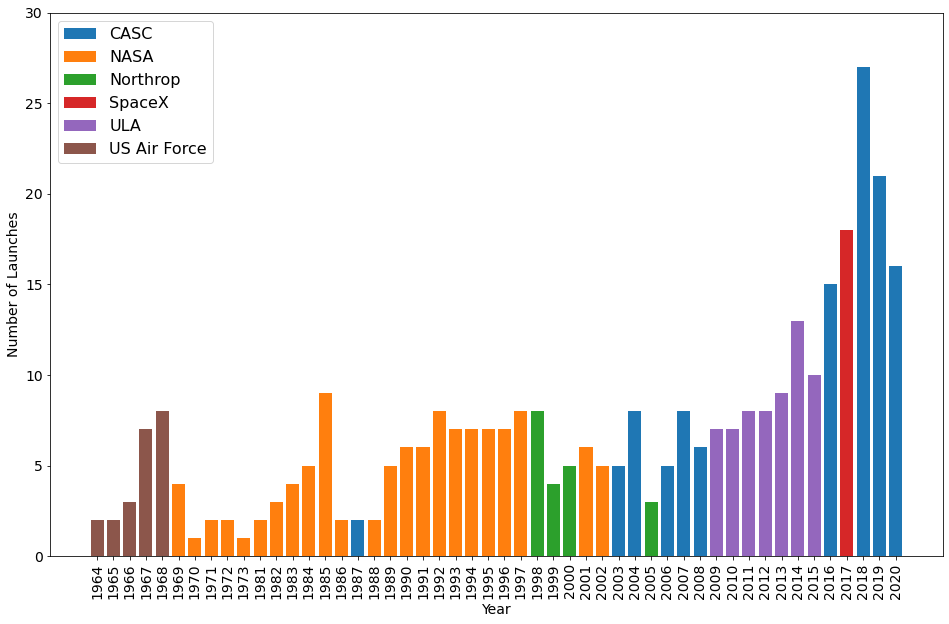

In [156]:
# Set figure dimensions and fontsize of x and y axis ticks
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set x and y axis labels and fontsize
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Launches', fontsize=14)
# Limit y to 13
plt.ylim(0, 30)

for col in doing_most_new.columns:
  # Plot the line with index values as x, counts of launches a month as y, and column month name as label
  plt.bar(doing_most_new.index, doing_most_new[col], 
           linewidth=3, label=doing_most_new[col].name)
  
# Show legend of plot (fontsize is 16)
plt.legend(fontsize=16) 